In [1]:
import time
start = time.time()

# Importing all the required packages for the project.

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras import layers
from tensorflow.python.keras import layers, regularizers
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import RidgeClassifier

# Downloading the latest updated dataset from the source.

In [3]:
# Function definition to retrieve the dataset:
def checkLatestVersion():
    if(os.path.exists("dly532.csv")):
        os.remove("dly532.csv")
        print("Deleted previous CSV file.")
        print("Downloading latest CSV file.")
        os.system("wget https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    else:
        print("Downloading dataset.")
        os.system("wget https://cli.fusio.net/cli/climate_data/webdata/dly532.csv")
        print("Downloaded dataset.")
    return None

In [4]:
# Function call defined.
checkLatestVersion()

Deleted previous CSV file.
Downloaded dataset.


In [5]:
# Updating the CSV file with newly downloaded dataset.
with open("dly532.csv", "r") as reading:
    data = reading.read().splitlines(True)
reading.close()
os.remove("dly532.csv")
with open("dly532.csv", "w") as writing:
    writing.writelines(data[26:])
writing.close()

# Reading the raw dataset

Adding Column names to the dataset and assigning it to a dataframe named read_data.

In [6]:
names = ["DATE", "INDICATOR0","MAX_AIR_TEMP",
         "INDICATOR1","MIN_AIR_TEMP","I_GRASS_MIN_TEMP",
         "GRASS_MIN_TEMP","INDICATOR2","RAIN_MM",
         "MEAN_CBL_PRESSURE","MEAN_WINDSPEED_KNOT","INDICATOR3",
         "HIGHEST_10MIN_WINDSPEED","INDICATOR4","WIND_DIR_DEGREE",
         "INDICATOR5","HIGHEST_GUST","SUN_DURATION","DOS",
         "GLOBAL_RADIATION","SOIL_TEMP","POTENTIAL_EVAPOTRANSPIRATION",
         "EVAPORATION","SMD_WELL_DRAINED","SMD_MODERATELY_DRAINED","SMD_POORLY_DRAINED"]
read_data = pd.read_csv("dly532.csv", names = names)
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


# Pre-processing the data.

Removing empty values, the old rows(till 28-oct-1979)and irrelevant data. 

In [7]:
read_data = pd.read_csv("dly532.csv", names = names)
read_data = read_data.replace(r'^\s*$', np.nan, regex=True)
read_data = read_data[read_data["SMD_POORLY_DRAINED"].notna()]
read_data

,DATE,INDICATOR0,MAX_AIR_TEMP,INDICATOR1,MIN_AIR_TEMP,I_GRASS_MIN_TEMP,GRASS_MIN_TEMP,INDICATOR2,RAIN_MM,MEAN_CBL_PRESSURE,...,HIGHEST_GUST,SUN_DURATION,DOS,GLOBAL_RADIATION,SOIL_TEMP,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION,SMD_WELL_DRAINED,SMD_MODERATELY_DRAINED,SMD_POORLY_DRAINED
13814,28-oct-1979,0,12.0,0,4.5,1,-1.9,0,0.9,997.9,...,22,4.2,0,573,9.350,0.7,0.9,0.0,-0.2,-0.2
13815,29-oct-1979,0,11.0,0,4.0,0,2.7,0,0.7,998.8,...,17,0.4,0,417,8.625,0.6,0.8,0.0,-0.1,-0.3
13816,30-oct-1979,0,15.7,0,8.8,0,7.4,0,4.8,990.8,...,36,0.6,0,247,10.550,0.8,1.0,0.0,-4.0,-4.4
13817,31-oct-1979,0,12.6,0,7.1,0,5.3,0,0.5,990.0,...,37,6.7,0,577,9.875,1.0,1.2,0.5,0.5,-3.7
13818,01-nov-1979,0,11.4,0,5.5,0,4.0,2,0.0,1001.6,...,27,7.0,0,585,8.175,1.2,1.5,1.6,1.6,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,0,7.5,0,1.3,0,1.1,3,0.0,1011.1,...,14,0.0,0,203,5.375,0.2,0.3,0.4,0.4,-8.6
28820,27-nov-2020,0,7.9,1,-1.2,1,-5.5,0,0.2,1008.2,...,12,4.7,0,345,4.975,0.1,0.2,0.3,0.3,-8.3
28821,28-nov-2020,0,10.2,0,0.6,1,-3.7,3,0.0,1008.3,...,15,0.6,0,222,4.800,0.3,0.4,0.6,0.6,-7.6
28822,29-nov-2020,0,10.8,0,1.9,1,-0.8,3,0.0,1015.1,...,14,1.9,0,198,6.650,0.2,0.3,0.8,0.8,-7.0


Checking the data types of each column.

In [8]:
read_data.dtypes

DATE                             object
INDICATOR0                        int64
MAX_AIR_TEMP                    float64
INDICATOR1                        int64
MIN_AIR_TEMP                    float64
I_GRASS_MIN_TEMP                  int64
GRASS_MIN_TEMP                   object
INDICATOR2                        int64
RAIN_MM                         float64
MEAN_CBL_PRESSURE               float64
MEAN_WINDSPEED_KNOT             float64
INDICATOR3                        int64
HIGHEST_10MIN_WINDSPEED          object
INDICATOR4                        int64
WIND_DIR_DEGREE                  object
INDICATOR5                        int64
HIGHEST_GUST                     object
SUN_DURATION                    float64
DOS                              object
GLOBAL_RADIATION                 object
SOIL_TEMP                        object
POTENTIAL_EVAPOTRANSPIRATION    float64
EVAPORATION                      object
SMD_WELL_DRAINED                 object
SMD_MODERATELY_DRAINED           object


### Converting object to float data types

Except Date column all other columns containing object type are converted into float.

In [9]:
read_data['HIGHEST_10MIN_WINDSPEED'] = read_data['HIGHEST_10MIN_WINDSPEED'].astype(float)
read_data['WIND_DIR_DEGREE'] = read_data['WIND_DIR_DEGREE'].astype(float)
read_data['HIGHEST_GUST'] = read_data['HIGHEST_GUST'].astype(float)
read_data['GRASS_MIN_TEMP'] = read_data['GRASS_MIN_TEMP'].astype(float)
read_data['EVAPORATION'] = read_data['EVAPORATION'].astype(float)
read_data['DOS'] = read_data['DOS'].astype(float)
read_data['GLOBAL_RADIATION'] = read_data['GLOBAL_RADIATION'].astype(float)
read_data['SOIL_TEMP'] = read_data['SOIL_TEMP'].astype(float)
read_data['SMD_WELL_DRAINED'] = read_data['SMD_WELL_DRAINED'].astype(float)
read_data['SMD_MODERATELY_DRAINED'] = read_data['SMD_MODERATELY_DRAINED'].astype(float)
read_data['SMD_POORLY_DRAINED'] = read_data['SMD_POORLY_DRAINED'].astype(float)
print(read_data.dtypes)

DATE                             object
INDICATOR0                        int64
MAX_AIR_TEMP                    float64
INDICATOR1                        int64
MIN_AIR_TEMP                    float64
I_GRASS_MIN_TEMP                  int64
GRASS_MIN_TEMP                  float64
INDICATOR2                        int64
RAIN_MM                         float64
MEAN_CBL_PRESSURE               float64
MEAN_WINDSPEED_KNOT             float64
INDICATOR3                        int64
HIGHEST_10MIN_WINDSPEED         float64
INDICATOR4                        int64
WIND_DIR_DEGREE                 float64
INDICATOR5                        int64
HIGHEST_GUST                    float64
SUN_DURATION                    float64
DOS                             float64
GLOBAL_RADIATION                float64
SOIL_TEMP                       float64
POTENTIAL_EVAPOTRANSPIRATION    float64
EVAPORATION                     float64
SMD_WELL_DRAINED                float64
SMD_MODERATELY_DRAINED          float64


# Removing Columns which are not relevant.

The following columns are removed because these columns are poorly correlated to the target column [RAIN_MM]

In [10]:
read_data = read_data.drop(columns = ["I_GRASS_MIN_TEMP","GRASS_MIN_TEMP",
                                      "INDICATOR2","GLOBAL_RADIATION","DOS",
                                      "SOIL_TEMP","INDICATOR0","INDICATOR1",
                                      "INDICATOR2","INDICATOR3","INDICATOR4",
                                      "INDICATOR5","MEAN_CBL_PRESSURE",
                                      "SMD_WELL_DRAINED","SMD_MODERATELY_DRAINED",
                                      "SMD_POORLY_DRAINED"])
read_data

,DATE,MAX_AIR_TEMP,MIN_AIR_TEMP,RAIN_MM,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,28-oct-1979,12.0,4.5,0.9,8.8,16.0,280.0,22.0,4.2,0.7,0.9
13815,29-oct-1979,11.0,4.0,0.7,8.2,12.0,240.0,17.0,0.4,0.6,0.8
13816,30-oct-1979,15.7,8.8,4.8,14.3,24.0,210.0,36.0,0.6,0.8,1.0
13817,31-oct-1979,12.6,7.1,0.5,13.5,24.0,250.0,37.0,6.7,1.0,1.2
13818,01-nov-1979,11.4,5.5,0.0,12.5,19.0,240.0,27.0,7.0,1.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...
28819,26-nov-2020,7.5,1.3,0.0,5.5,10.0,270.0,14.0,0.0,0.2,0.3
28820,27-nov-2020,7.9,-1.2,0.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2
28821,28-nov-2020,10.2,0.6,0.0,6.3,11.0,80.0,15.0,0.6,0.3,0.4
28822,29-nov-2020,10.8,1.9,0.0,4.4,10.0,280.0,14.0,1.9,0.2,0.3


Filling Null values in the dataset with float 0 and checking for columns containing any Null values in it.

In [11]:
read_data = read_data.fillna(read_data.mean())
read_data.isnull().any()

DATE                            False
MAX_AIR_TEMP                    False
MIN_AIR_TEMP                    False
RAIN_MM                         False
MEAN_WINDSPEED_KNOT             False
HIGHEST_10MIN_WINDSPEED         False
WIND_DIR_DEGREE                 False
HIGHEST_GUST                    False
SUN_DURATION                    False
POTENTIAL_EVAPOTRANSPIRATION    False
EVAPORATION                     False
dtype: bool

# Appending a Categorical target column named "RAIN_BOOLEAN".

Building the target column values based upon the RAIN_MM column values.

In [12]:
read_data.loc[read_data["RAIN_MM"] == 0, "RAIN_BOOLEAN"] = 0
read_data.loc[read_data["RAIN_MM"] > 0, "RAIN_BOOLEAN"] =  1

Code to check and plot the distribution of target variable.

[1 1 1 ... 0 0 1]
15010
0 :  6114
1 :  8896


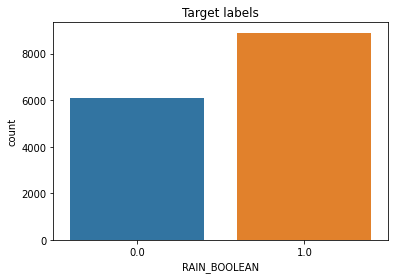

In [13]:
warnings.filterwarnings("ignore")

target_Arr = np.array([int(i) for i in read_data["RAIN_BOOLEAN"]])
print(target_Arr)
print(len(target_Arr))
count = 0
for i in target_Arr:
    if i == 0:
        count+=1
print("0 : ",count)
print("1 : ",len(target_Arr)-count)
sns.countplot(read_data.RAIN_BOOLEAN)
plt.title("Target labels")
plt.show()

Removing column RAIN_MM, DATE, RAIN_BOOLEAN for ease, Since we are not going to make use of them further for training.

In [14]:
read_data = read_data.drop(columns = ["RAIN_MM","DATE","RAIN_BOOLEAN"])
read_data

,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,12.0,4.5,8.8,16.0,280.0,22.0,4.2,0.7,0.9
13815,11.0,4.0,8.2,12.0,240.0,17.0,0.4,0.6,0.8
13816,15.7,8.8,14.3,24.0,210.0,36.0,0.6,0.8,1.0
13817,12.6,7.1,13.5,24.0,250.0,37.0,6.7,1.0,1.2
13818,11.4,5.5,12.5,19.0,240.0,27.0,7.0,1.2,1.5
...,...,...,...,...,...,...,...,...,...
28819,7.5,1.3,5.5,10.0,270.0,14.0,0.0,0.2,0.3
28820,7.9,-1.2,3.0,7.0,140.0,12.0,4.7,0.1,0.2
28821,10.2,0.6,6.3,11.0,80.0,15.0,0.6,0.3,0.4
28822,10.8,1.9,4.4,10.0,280.0,14.0,1.9,0.2,0.3


### Reading Final Features of Dataset

# Normalizing Dataset.

In [16]:
# Min-max normalization
read_data=(read_data-read_data.min())/(read_data.max()-read_data.min())
# Saving the latest date data separately for purpose of prediction.
read_data_presentDate = read_data.tails(1)
# Removing the latest date data from the dataset.
read_data.drop(read_data.tail(1).index, inplace = True)
norm_training_data = read_data.values
print(read_data.columns)
read_data

Index(['MAX_AIR_TEMP', 'MIN_AIR_TEMP', 'MEAN_WINDSPEED_KNOT',
       'HIGHEST_10MIN_WINDSPEED', 'WIND_DIR_DEGREE', 'HIGHEST_GUST',
       'SUN_DURATION', 'POTENTIAL_EVAPOTRANSPIRATION', 'EVAPORATION'],
      dtype='object')


,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
13814,0.500000,0.545752,0.239316,0.264151,0.777778,0.246753,0.264151,0.122807,0.111111
13815,0.470060,0.529412,0.222222,0.188679,0.666667,0.181818,0.025157,0.105263,0.098765
13816,0.610778,0.686275,0.396011,0.415094,0.583333,0.428571,0.037736,0.140351,0.123457
13817,0.517964,0.630719,0.373219,0.415094,0.694444,0.441558,0.421384,0.175439,0.148148
13818,0.482036,0.578431,0.344729,0.320755,0.666667,0.311688,0.440252,0.210526,0.185185
...,...,...,...,...,...,...,...,...,...
28818,0.368263,0.500000,0.207977,0.188679,0.750000,0.181818,0.440252,0.035088,0.024691
28819,0.365269,0.441176,0.145299,0.150943,0.750000,0.142857,0.000000,0.035088,0.037037
28820,0.377246,0.359477,0.074074,0.094340,0.388889,0.116883,0.295597,0.017544,0.024691
28821,0.446108,0.418301,0.168091,0.169811,0.222222,0.155844,0.037736,0.052632,0.049383


# Split dataset into training set and test set

In [17]:
#Splitting the original dataset
X_train, X_test, y_train, y_test = train_test_split(norm_training_data, target_Arr[:-1], test_size=0.2, random_state=42)

#Saving the training dataset into dataframe for p-value evaluation
read_data_train = pd.DataFrame(data=X_train,columns=['MAX_AIR_TEMP', 'MIN_AIR_TEMP', 'MEAN_WINDSPEED_KNOT',
                                                       'HIGHEST_10MIN_WINDSPEED', 'WIND_DIR_DEGREE', 'HIGHEST_GUST',
                                                       'SUN_DURATION', 'POTENTIAL_EVAPOTRANSPIRATION', 'EVAPORATION'])
read_data_train

,MAX_AIR_TEMP,MIN_AIR_TEMP,MEAN_WINDSPEED_KNOT,HIGHEST_10MIN_WINDSPEED,WIND_DIR_DEGREE,HIGHEST_GUST,SUN_DURATION,POTENTIAL_EVAPOTRANSPIRATION,EVAPORATION
0,0.769461,0.790850,0.279202,0.320755,0.583333,0.363636,0.446541,0.403509,0.382716
1,0.634731,0.656863,0.313390,0.320755,0.861111,0.350649,0.528302,0.385965,0.407407
2,0.646707,0.774510,0.128205,0.150943,0.750000,0.142857,0.226415,0.245614,0.234568
3,0.485030,0.513072,0.561254,0.641509,0.666667,0.636364,0.169811,0.245614,0.246914
4,0.482036,0.323529,0.088319,0.113208,0.416667,0.103896,0.421384,0.017544,0.024691
...,...,...,...,...,...,...,...,...,...
12002,0.404192,0.565359,0.678063,0.622642,0.638889,0.597403,0.257862,0.228070,0.222222
12003,0.760479,0.885621,0.199430,0.245283,0.638889,0.207792,0.088050,0.473684,0.432099
12004,0.733533,0.784314,0.182336,0.283019,0.333333,0.259740,0.245283,0.421053,0.419753
12005,0.494012,0.503268,0.301994,0.358491,0.527778,0.454545,0.000000,0.157895,0.148148


# Selecting feature columns based upon P-values.

In [18]:
column_names = list(read_data_train.columns)
p_value_max = 1
while (len(column_names)>0):
    p_values= []
    training_with_ColumnValues_1 = read_data_train[column_names]
    training_with_ColumnValues_1 = sm.add_constant(training_with_ColumnValues_1)
    model = sm.OLS(y_train,training_with_ColumnValues_1.astype(float)).fit()
    p_values = pd.Series(model.pvalues.values[1:],index = column_names)      
    p_value_max = max(p_values)
    feature_with_p_max = p_values.idxmax()
    if(p_value_max>0.05):
        column_names.remove(feature_with_p_max)
    else:
        break
final_features = column_names
print("CHOSEN FEATURES : ", final_features)
print("NUMBER OF FEATURES : ",len(final_features))

CHOSEN FEATURES :  ['MAX_AIR_TEMP', 'MIN_AIR_TEMP', 'MEAN_WINDSPEED_KNOT', 'HIGHEST_10MIN_WINDSPEED', 'WIND_DIR_DEGREE', 'HIGHEST_GUST', 'SUN_DURATION', 'POTENTIAL_EVAPOTRANSPIRATION', 'EVAPORATION']
NUMBER OF FEATURES :  9


No column was dropped as all the column data have p-value less than 0.05.

# Selecting feature columns based upon box plot.

Box plot was plotted with RAIN_BOOLEAN column against all othe feature column.

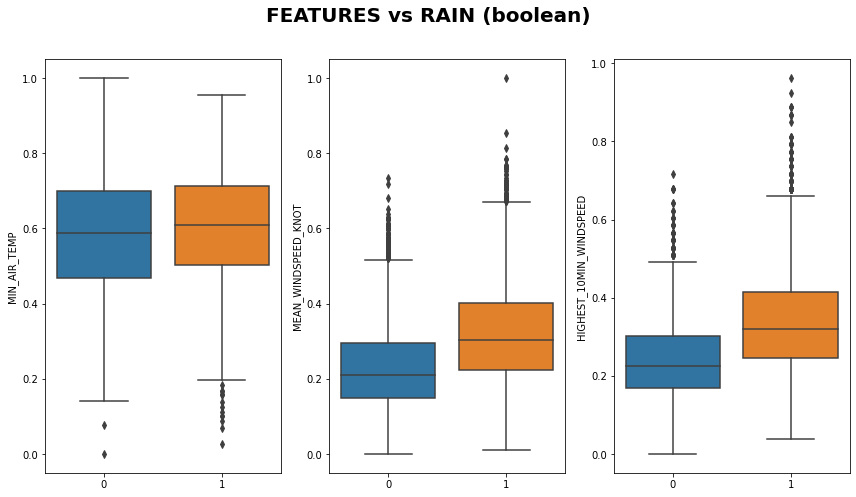

In [19]:
fig = plt.figure(figsize=(12, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')

plt.subplot(131)
sns.boxplot(x=y_train, y=read_data_train.MIN_AIR_TEMP)
plt.subplot(132)
sns.boxplot(x=y_train, y=read_data_train.MEAN_WINDSPEED_KNOT)
plt.subplot(133)
sns.boxplot(x=y_train, y=read_data_train.HIGHEST_10MIN_WINDSPEED)
plt.tight_layout()

plt.tight_layout()
plt.show()

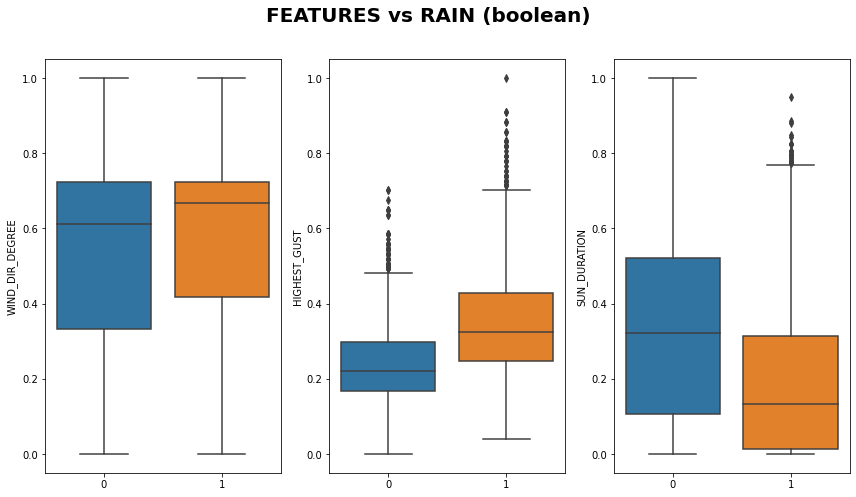

In [20]:
fig = plt.figure(figsize=(12, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')

plt.subplot(131)
sns.boxplot(x=y_train, y=read_data_train.WIND_DIR_DEGREE)
plt.subplot(132)
sns.boxplot(x=y_train, y=read_data_train.HIGHEST_GUST)
plt.subplot(133)
sns.boxplot(x=y_train, y=read_data_train.SUN_DURATION)
plt.tight_layout()
plt.show()

# Removing columns from the read_data_train based on box plot.

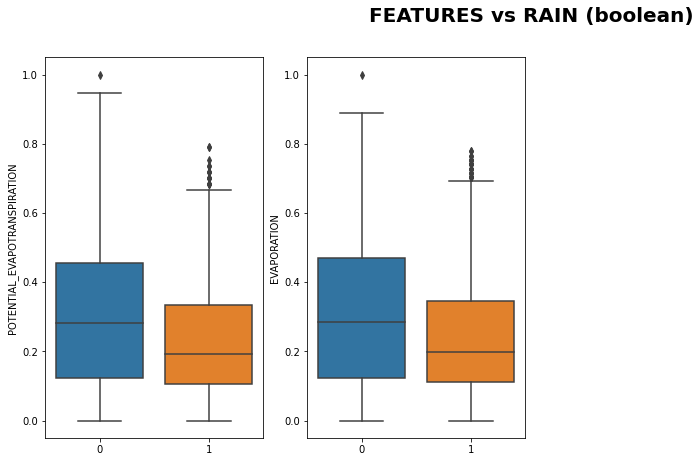

In [21]:
fig = plt.figure(figsize=(18, 7))
plt.xticks(rotation='vertical', fontsize='20')
fig.suptitle('FEATURES vs RAIN (boolean)\n',fontweight ="bold", fontsize='20')
plt.subplot(141)
sns.boxplot(x=y_train, y=read_data_train.POTENTIAL_EVAPOTRANSPIRATION)
plt.subplot(142)
sns.boxplot(x=y_train, y=read_data_train.EVAPORATION)

plt.show()

In [22]:
features_removed = ["MIN_AIR_TEMP","MAX_AIR_TEMP","POTENTIAL_EVAPOTRANSPIRATION"]
read_data_train = read_data_train.drop(columns = features_removed)
read_data_presentDate = read_data_presentDate.drop(columns = features_removed)

norm_latest_data = read_data_presentDate.values


# Implementation of various machine learning models.

# Baseline Model (predicts class with target value 0 everytime)

In [24]:
y_pred_baseline = y_test.copy()
for j in range(len(y_pred_baseline)):
    if y_pred_baseline[j] == 1:
        y_pred_baseline[j] = 0
accuracy_baseline = metrics.accuracy_score(y_test,y_pred_baseline)
print("BASELINE MODEL ACCURACY : ",accuracy_baseline)

BASELINE MODEL ACCURACY :  0.399400399733511


# Logistic Regression Model using Cross-validation.

In [25]:
warnings.filterwarnings("ignore")

max_iter_Arr = [50,100,150,200,250,300,350,400,450,500]
f1_score=[]
std_error=[]
mean_accuracy = []
for max_iter_Val in max_iter_Arr:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    logisticReg = LogisticRegression(penalty="l1",max_iter = 100, solver = "liblinear") #max_iter alteration for different values
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        logisticReg.fit(X_train[train], y_train[train])
        ypred = logisticReg.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = logisticReg.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(logisticReg,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("max_iter Value :",max_iter_Val)
    print("LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%max_iter_Val,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")

max_iter Value : 50
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=50 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7480622319107255
MEAN OF THE F1-SCORES : 0.7978643878119811
STANDARD DEVIATION OF F1-SCORE : 0.006585208199970959 

max_iter Value : 100
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=100 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7478957040173034
MEAN OF THE F1-SCORES : 0.797864777757938
STANDARD DEVIATION OF F1-SCORE : 0.0066089928982713516 

max_iter Value : 150
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=150 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7478956693384416
MEAN OF THE F1-SCORES : 0.7977976001768299
STANDARD DEVIATION OF F1-SCORE : 0.0066279392669599535 

max_iter Value : 200
LOGISTIC REGRESSION MEAN ACCURACY FOR MAX_ITER=200 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7479789679640143
MEAN OF THE F1-SCORES : 0.7978643878119811
STANDARD DEVIATION OF F1-SCORE : 0.006585208199970959 

max_iter Value : 250
LOGISTIC REGRESSION 

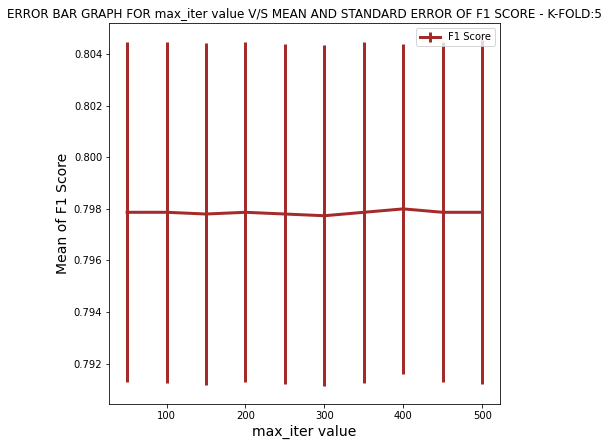

In [26]:
plt.figure(figsize=(7,7))
plt.errorbar(max_iter_Arr,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('max_iter value', fontsize = 14)
plt.ylabel('Mean of F1 Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR max_iter value V/S MEAN AND STANDARD ERROR OF F1 SCORE - K-FOLD:%s"%str(kfold_n))
plt.legend(["F1 Score"], bbox_to_anchor=(1, 1))
plt.show()

In [27]:
logisticReg = LogisticRegression(penalty="l1",max_iter = 350, solver = "liblinear") #max_iter alteration for different values
logisticReg.fit(X_train, y_train)
y_pred_logistic = logisticReg.predict(X_train)
intercept_value = logisticReg.intercept_
print("INTERCEPT VALUE :", intercept_value[0])
logisticRegression_accuracy = metrics.accuracy_score(y_train,y_pred_logistic)
print("Accuracy over training data : ",logisticRegression_accuracy)

INTERCEPT VALUE : -2.976642018023436
Accuracy over training data :  0.7490630465561756


Accuracy:  0.7318454363757495
Precision:  0.7577479338842975
Recall:  0.8136439267886856
F1-Score:  0.7847017919229742

CONFUSION MATRIX VALUES :
Logistic Regression Model True Positive : 1467
Logistic Regression Model False Negative : 336
Logistic Regression Model True Negative : 730
Logistic Regression Model False Positive : 469 



Text(0.5, 1.0, 'Trained Logistic Regression Model')

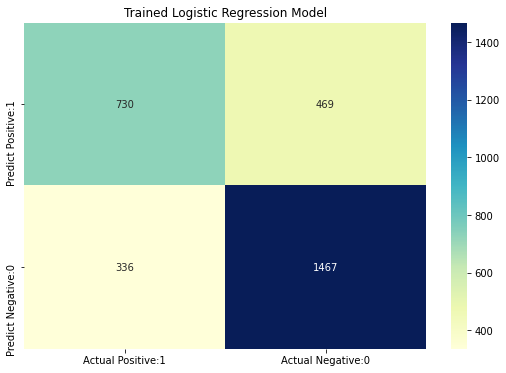

In [28]:
#Logistic regression model performance over testing data.
y_pred_logistic = logisticReg.predict(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_logistic))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_logistic))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_logistic))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_logistic))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_logistic).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("Logistic Regression Model True Positive :", tp_model)
print("Logistic Regression Model False Negative :",fn_model)
print("Logistic Regression Model True Negative :", tn_model)
print("Logistic Regression Model False Positive :",fp_model,"\n")
#plt.confusion_matrix(logisticReg, X_test, y_test)
#plt.show()

CM = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained Logistic Regression Model')

# SVM Model using Cross-validation.

C Value : 0.001
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.5906546016595222
MEAN OF THE F1-SCORES : 0.7464439641641367
STANDARD DEVIATION OF F1-SCORE : 9.738977939384162e-05 

C Value : 0.01
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.722744478171564
MEAN OF THE F1-SCORES : 0.7966369091180978
STANDARD DEVIATION OF F1-SCORE : 0.0030419843239056876 

C Value : 0.1
SVM MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7393182343881834
MEAN OF THE F1-SCORES : 0.801323577389789
STANDARD DEVIATION OF F1-SCORE : 0.005594368744047418 

C Value : 1
SVM MODEL MEAN ACCURACY FOR C Value=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7493120580829318
MEAN OF THE F1-SCORES : 0.8044183608730344
STANDARD DEVIATION OF F1-SCORE : 0.007516844789239199 

C Value : 10
SVM MODEL MEAN ACCURACY FOR C Value=10 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.759972686928600

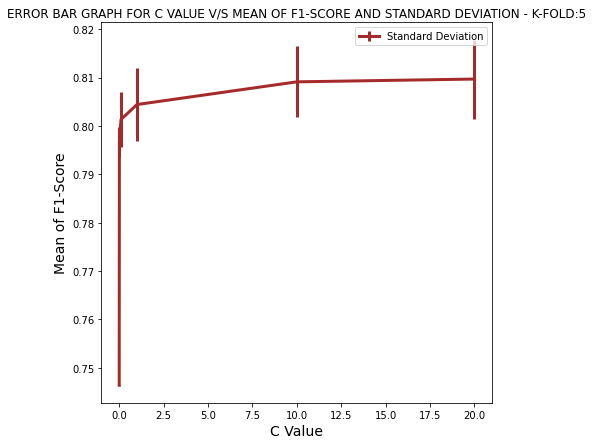

In [29]:
warnings.filterwarnings("ignore")
C_array = [0.001,0.01,0.1,1,10,20]
f1_score=[]
std_error=[]
mean_accuracy = []
for C_value in C_array:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    svmModel = svm.SVC(C = C_value, kernel = "rbf")
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        svmModel.fit(X_train[train], y_train[train])
        ypred = svmModel.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = svmModel.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(svmModel,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("C Value :",C_value)
    print("SVM MODEL MEAN ACCURACY FOR C Value=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%C_value,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")
plt.figure(figsize=(7,7))
plt.errorbar(C_array,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('C Value', fontsize = 14)
plt.ylabel('Mean of F1-Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR C VALUE V/S MEAN OF F1-SCORE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

In [30]:
#Chosen model with best suited C value.
C_value = 10
svmModel = svm.SVC(C = C_value, kernel = "rbf")
svmModel.fit(X_train,y_train)
print("\n-------------------------------\nSVM MODEL TRAINED FOR C=%s.\n-------------------------------"%str(C_value))
SVMintercept_value = svmModel.intercept_
print("INTERCEPT VALUE :", SVMintercept_value[0])
print("SVM MODEL SCORE FOR  OVER TRAINING DATA FOR C=%s :"%str(C_value),svmModel.score(X_train,y_train))


-------------------------------
SVM MODEL TRAINED FOR C=10.
-------------------------------
INTERCEPT VALUE : -0.09231463256088028
SVM MODEL SCORE FOR  OVER TRAINING DATA FOR C=10 : 0.7684683934371617


Accuracy:  0.748834110592938
Precision:  0.7595249876298862
Recall:  0.8513588463671659
F1-Score:  0.8028242677824268
CONFUSION MATRIX VALUES :
SVM Model True Positive : 1535
SVM Model False Negative : 268
SVM Model True Negative : 713
SVM Model False Positive : 486 



Text(0.5, 1.0, 'Trained SVM Model')

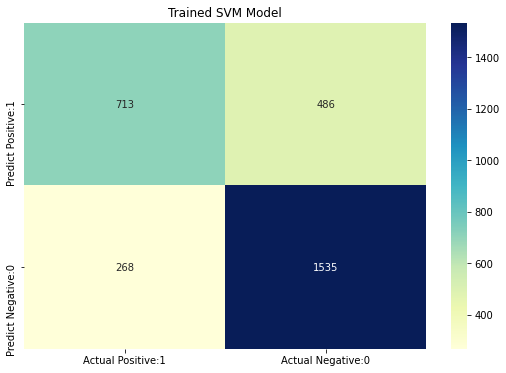

In [31]:
#SVM model performance over testing data.
y_pred_svm = svmModel.predict(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_svm))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_svm))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_svm))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_svm ).ravel()
print("CONFUSION MATRIX VALUES :")
print("SVM Model True Positive :", tp_model)
print("SVM Model False Negative :",fn_model)
print("SVM Model True Negative :", tn_model)
print("SVM Model False Positive :",fp_model,"\n")
#confusion_matrix(svmModel, X_test, y_test)
#plt.show()

CM_2 = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM_2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained SVM Model')

# kNN model using cross validation.

n Value : 1
kNN MODEL MEAN ACCURACY FOR n VALUE=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.5165310852067722
MEAN OF THE F1-SCORES : 0.7233373982672321
STANDARD DEVIATION OF F1-SCORE : 0.0037951959954970397 

n Value : 2
kNN MODEL MEAN ACCURACY FOR n VALUE=2 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.4735551623646961
MEAN OF THE F1-SCORES : 0.6585836815588886
STANDARD DEVIATION OF F1-SCORE : 0.0062741147670823515 

n Value : 3
kNN MODEL MEAN ACCURACY FOR n VALUE=3 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.5293531779072994
MEAN OF THE F1-SCORES : 0.752798845071219
STANDARD DEVIATION OF F1-SCORE : 0.010120227622632276 

n Value : 4
kNN MODEL MEAN ACCURACY FOR n VALUE=4 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.49895580072162093
MEAN OF THE F1-SCORES : 0.7184057169847078
STANDARD DEVIATION OF F1-SCORE : 0.010695303689880052 

n Value : 5
kNN MODEL MEAN ACCURACY FOR n VALUE=5 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.5340190813211213
MEAN OF

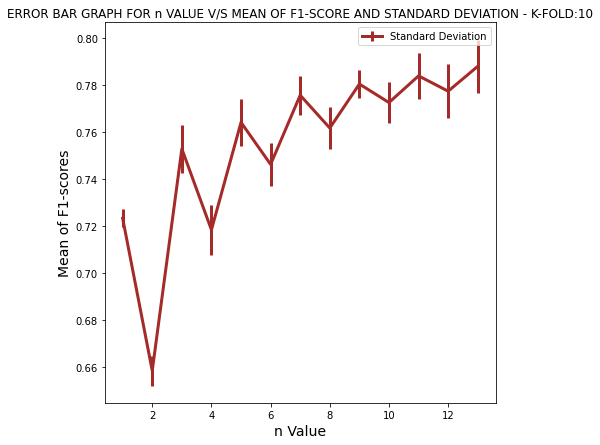

In [32]:
neigh_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13]
f1_score=[]
std_error=[]
mean_accuracy = []
for neigh_size in neigh_arr:
    kfold_n = 10
    kfold = KFold(n_splits=kfold_n)
    kNNmodel = KNeighborsClassifier(n_neighbors=neigh_size)
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        kNNmodel.fit(norm_training_data[train], y_train[train])
        ypred = kNNmodel.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = kNNmodel.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(kNNmodel,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("n Value :",neigh_size)
    print("kNN MODEL MEAN ACCURACY FOR n VALUE=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%neigh_size,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")

plt.figure(figsize=(7,7))
plt.errorbar(neigh_arr,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('n Value', fontsize = 14)
plt.ylabel('Mean of F1-scores', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR n VALUE V/S MEAN OF F1-SCORE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

In [33]:
kNNmodel = KNeighborsClassifier(n_neighbors=4)
kNNmodel.fit(X_train, y_train)
print("-----------------------------\nkNN CLASSIFIER MODEL TRAINED.\n-----------------------------")
y_pred_kNN = kNNmodel.predict(X_train)
kNN_accuracy = accuracy_score(y_train,y_pred_kNN)
print("kNN MODEL ACCURACY OVER TRAINING DATA : ",kNN_accuracy)

-----------------------------
kNN CLASSIFIER MODEL TRAINED.
-----------------------------
kNN MODEL ACCURACY OVER TRAINING DATA :  0.803031564920463


Accuracy:  0.6825449700199867
Precision:  0.772785622593068
Recall:  0.6677759290072102
F1-Score:  0.7164534364772389

CONFUSION MATRIX VALUES :
kNN Model True Positive : 1204
kNN Model False Negative : 599
kNN Model True Negative : 845
kNN Model False Positive : 354 



Text(0.5, 1.0, 'Trained kNN Model')

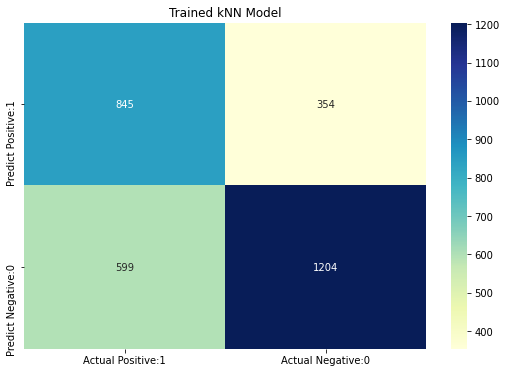

In [34]:
#kNN model performance over testing data.
y_pred_kNN = kNNmodel.predict(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_kNN))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_kNN))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_kNN))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_kNN))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_kNN).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("kNN Model True Positive :", tp_model)
print("kNN Model False Negative :",fn_model)
print("kNN Model True Negative :", tn_model)
print("kNN Model False Positive :",fp_model,"\n")
#confusion_matrix(kNNmodel, X_test, y_test)
#plt.show()

CM_3 = confusion_matrix(y_test,y_pred_kNN)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM_3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained kNN Model')

# Ridge Classifier Model

C Value : 0.001
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7104188478225663
MEAN OF THE F1-SCORES : 0.7916912020563716
STANDARD DEVIATION OF F1-SCORE : 0.0033060048511104312 

C Value : 0.01
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7293233356487253
MEAN OF THE F1-SCORES : 0.7907917605554523
STANDARD DEVIATION OF F1-SCORE : 0.010165258321554838 

C Value : 0.1
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=0 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7364026437776932
MEAN OF THE F1-SCORES : 0.7914710485515093
STANDARD DEVIATION OF F1-SCORE : 0.00986933276110483 

C Value : 1
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=1 USING 10-FOLD CROSSVALIDATION OVER TESTING DATA:  0.7427323336342303
MEAN OF THE F1-SCORES : 0.7978715616891787
STANDARD DEVIATION OF F1-SCORE : 0.007619200434639363 

C Value : 10
RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=10 US

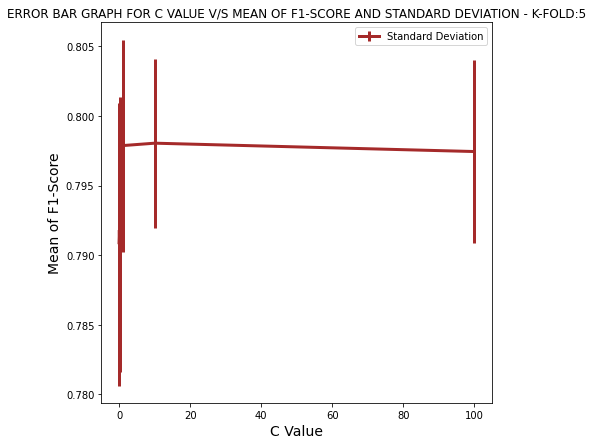

In [35]:
warnings.filterwarnings("ignore")
C_array = [0.001,0.01,0.1,1,10,100]
f1_score=[]
std_error=[]
mean_accuracy = []
for C_value in C_array:
    kfold_n = 5
    kfold = KFold(n_splits=kfold_n)
    ridge_model = RidgeClassifier(alpha = 1/(2*C_value))
    temp=[]
    temp_acc = []
    for train, test in kfold.split(X_train):
        ridge_model.fit(X_train[train], y_train[train])
        ypred = ridge_model.predict(X_train[test])
        temp_acc.append(accuracy_score(y_train[test],ypred))
        ypred = ridge_model.predict(X_train)
    mean_accuracy.append(np.array(temp_acc).mean())
    scores = cross_val_score(ridge_model,X_train[train],y_train[train], cv=5, scoring='f1')
    f1_score.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    print("C Value :",C_value)
    print("RIDGE CLASSIFIER MODEL MEAN ACCURACY FOR C Value=%d USING 10-FOLD CROSSVALIDATION OVER TESTING DATA: "%C_value,mean_accuracy[-1])
    print("MEAN OF THE F1-SCORES :",f1_score[-1])
    print("STANDARD DEVIATION OF F1-SCORE :",std_error[-1],"\n")
plt.figure(figsize=(7,7))
plt.errorbar(C_array,f1_score,yerr=std_error,linewidth=3, color = "brown")
plt.xlabel('C Value', fontsize = 14)
plt.ylabel('Mean of F1-Score', fontsize = 14)
plt.title("ERROR BAR GRAPH FOR C VALUE V/S MEAN OF F1-SCORE AND STANDARD DEVIATION - K-FOLD:%s"%str(kfold_n))
plt.legend(["Standard Deviation"], bbox_to_anchor=(1, 1))
plt.show()

Accuracy:  0.7355096602265156
Precision:  0.7536450477626948
Recall:  0.8313921242373822
F1-Score:  0.7906118143459916

CONFUSION MATRIX VALUES :
kNN Model True Positive : 1499
kNN Model False Negative : 304
kNN Model True Negative : 709
kNN Model False Positive : 490 



Text(0.5, 1.0, 'Trained Ridge Classifier Model')

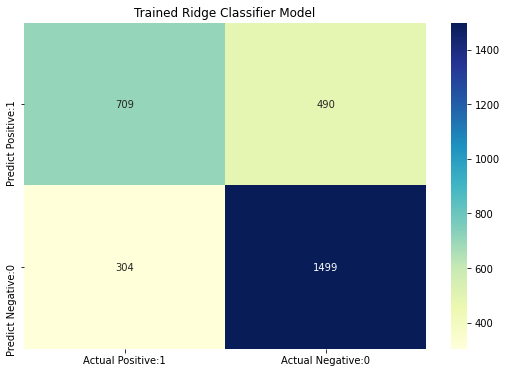

In [36]:
y_pred_ridge = ridge_model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_ridge))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_ridge))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_ridge))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_ridge))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_ridge).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("kNN Model True Positive :", tp_model)
print("kNN Model False Negative :",fn_model)
print("kNN Model True Negative :", tn_model)
print("kNN Model False Positive :",fp_model,"\n")
#confusion_matrix(ridge_model, X_test, y_test)
#plt.show()

CM_4 = confusion_matrix(y_test,y_pred_ridge)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM_4, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained Ridge Classifier Model')

# Neural Network model.

In [37]:
nnmodel = Sequential()
nnmodel.add(Dense(16, activation='relu', input_shape=(9,)))
nnmodel.add(Dense(16, activation='relu'))
nnmodel.add(Dense(16, activation='relu'))
nnmodel.add(Dropout(0.25))
nnmodel.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1(0.0001)))

nnmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
nnmodel.fit(X_train,y_train,epochs=20, batch_size=64, validation_split=0.1)

y_pred_nn = nnmodel.predict_classes(X_train)
NN_accuracy = accuracy_score(y_train,y_pred_nn)
print("NEURAL NETWORK MODEL ACCURACY OVER TRAINING DATA : ",NN_accuracy)

Epoch 1/20
169/169 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.6321 - val_loss: 0.5877 - val_accuracy: 0.7011
Epoch 2/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7155 - val_loss: 0.5455 - val_accuracy: 0.7286
Epoch 3/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7274 - val_loss: 0.5359 - val_accuracy: 0.7286
Epoch 4/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7320 - val_loss: 0.5352 - val_accuracy: 0.7311
Epoch 5/20
169/169 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7357 - val_loss: 0.5363 - val_accuracy: 0.7311
Epoch 6/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7399 - val_loss: 0.5424 - val_accuracy: 0.7219
Epoch 7/20
169/169 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7381 - val_loss: 0.5417 - val_accuracy: 0.7261
Epoch 

Accuracy:  0.7298467688207861
Precision:  0.748496993987976
Recall:  0.8286189683860233
F1-Score:  0.7865227691497764

CONFUSION MATRIX VALUES :
Neural Network Model True Positive : 1494
Neural Network Model False Negative : 309
Neural Network Model True Negative : 697
Neural Network Model False Positive : 502 



Text(0.5, 1.0, 'Trained Ridge Classifier Model')

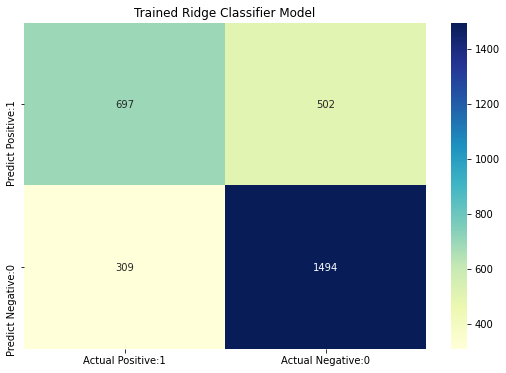

In [38]:
#kNN model performance over testing data.
y_pred_nn = nnmodel.predict_classes(X_test)

# Model Accuracy: How well the model predicts over the training data?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_nn))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: ", metrics.precision_score(y_test, y_pred_nn))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: ", metrics.recall_score(y_test, y_pred_nn))

# Model F1-Score
print("F1-Score: ", metrics.f1_score(y_test, y_pred_nn))

# Model Confusion Matrix
tn_model, fp_model, fn_model, tp_model = confusion_matrix(y_test,y_pred_nn).ravel()
print("\nCONFUSION MATRIX VALUES :")
print("Neural Network Model True Positive :", tp_model)
print("Neural Network Model False Negative :",fn_model)
print("Neural Network Model True Negative :", tn_model)
print("Neural Network Model False Positive :",fp_model,"\n")
# confusion_matrix(nnmodel, X_test, y_test)
# plt.show()

CM_6 = confusion_matrix(y_test,y_pred_nn)
plt.figure(figsize=(9,6))
cm_matrix = pd.DataFrame(data = CM_6, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Trained Ridge Classifier Model')

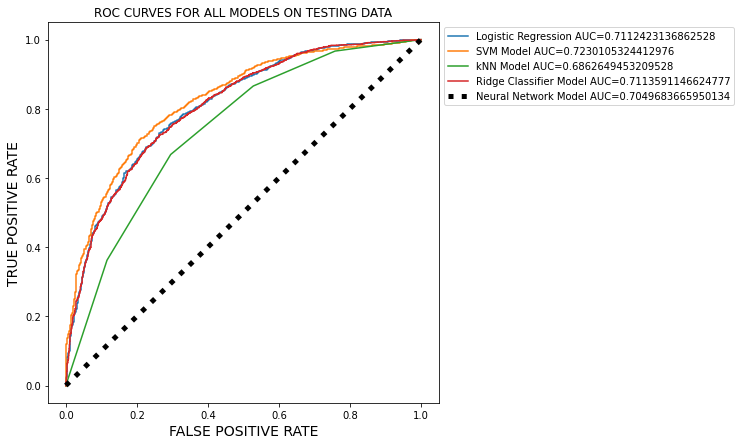

In [39]:
plt.figure(figsize=(7,7))
ax = plt.gca()
plt1 = plot_roc_curve(logisticReg, X_test, y_test, ax = ax)
plt2 = plot_roc_curve(svmModel, X_test, y_test,ax = ax)
plt3 = plot_roc_curve(kNNmodel, X_test, y_test, ax = ax)
plt4 = plot_roc_curve(ridge_model, X_test, y_test, ax = ax)
## plt4 = plot_roc_curve(nnmodel, X_test, y_test,ax = ax)

plt.plot([0,1], [0,1], color = "black",linestyle = "dotted", linewidth=5)

auc_logisticReg = roc_auc_score(y_test, y_pred_logistic)
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_kNN = roc_auc_score(y_test, y_pred_kNN)
auc_ridge = roc_auc_score(y_test, y_pred_ridge)
auc_nn = roc_auc_score(y_test, y_pred_nn)
auc_baseline = roc_auc_score(y_test, y_pred_baseline)

plt.title("ROC CURVES FOR ALL MODELS ON TESTING DATA", fontsize = "12")
plt.xlabel("FALSE POSITIVE RATE", fontsize = "14")
plt.ylabel("TRUE POSITIVE RATE", fontsize = "14")
plt.legend(["Logistic Regression AUC=%s"%str(auc_logisticReg),
            "SVM Model AUC=%s"%str(auc_svm),"kNN Model AUC=%s"%str(auc_kNN),
            "Ridge Classifier Model AUC=%s"%str(auc_ridge), "Neural Network Model AUC=%s"%str(auc_nn),
            "Baseline Classifier AUC=%s"%str(auc_baseline)],bbox_to_anchor=(1, 1))
plt.show()

In [40]:
#read_data.to_excel("data_rough.xlsx")
#print("XLSX format file written for observation.")

In [41]:
end = time.time()
print(end - start)

514.6936070919037
